In [1]:
%%time

from pandas import DataFrame, Grouper
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import sys

CPU times: user 402 ms, sys: 793 ms, total: 1.19 s
Wall time: 276 ms


In [2]:
%%time
# import our own stuff
sys.path.append("../python/src")

from tools import read_water_data, extract_features
from tools import get_oecd_iso3_code_mapping

from waterData import default_features

CPU times: user 75.7 ms, sys: 0 ns, total: 75.7 ms
Wall time: 75.3 ms


In [3]:
%%time
# set some options

datadir = "../data/"
cachedir = "../data/cache" 

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.62 µs


In [4]:
%%time

display("warming up cache")
null = read_water_data(setname="fullset",datadir=datadir,cachedir=cachedir)
del null

'warming up cache'

Reading Datafrom cached file: ../data/cache/fullset.p
CPU times: user 6.11 s, sys: 1.81 s, total: 7.92 s
Wall time: 7.92 s


In [5]:
%%time

# read some data and get some mapping that may needs calculations

# the codemapping is generate over the full dataset to get all oecd-country-codes
# and from a fetch of the countries known to worldbank
codemapping = get_oecd_iso3_code_mapping(cachedir=cachedir,datadir=datadir)

# the data from oecd must be downloaded and saved as zips in the data-dir, check readme for links
oecddf = read_water_data(setname="fullset",datadir=datadir,cachedir=cachedir)


display("all data")
# tell me what it is
oecddf.describe()

Reading countrycode-mapping cached file: ../data/cache/oecdiso3.p
Reading Datafrom cached file: ../data/cache/fullset.p


'all data'

CPU times: user 10.9 s, sys: 2.87 s, total: 13.8 s
Wall time: 13.8 s


,USD_Commitment,USD_Disbursement,USD_Received,USD_Commitment_Defl,USD_Disbursement_Defl,USD_Received_Defl,USD_Adjustment,USD_Adjustment_Defl,USD_AmountUntied,USD_AmountPartialTied,...,TypeRepayment,NumberRepayment,Interest2,USD_Interest,USD_Outstanding,USD_Arrears_Principal,USD_Arrears_Interest,CapitalExpend,PSIflag,PSIAddType
count,3.275182e+06,3.762420e+06,2.075152e+06,3.275072e+06,3.762156e+06,2.075140e+06,60032.000000,60032.000000,1.899677e+06,1.006533e+06,...,549171.000000,564867.000000,333850.000000,1.110691e+06,881558.000000,646025.000000,651855.000000,32902.000000,3301.000000,1218.000000
mean,1.700388e+00,9.906404e-01,4.688217e-01,2.046867e+00,1.047619e+00,5.014058e-01,-0.748338,-0.839550,9.199535e-01,2.892181e-01,...,1.472700,1.854219,394.025889,1.291592e-01,6.420891,0.147550,0.218216,0.000088,1.987882,2.369458
std,2.020509e+01,1.468442e+01,7.989517e+00,2.368979e+01,1.543262e+01,8.453970e+00,11.821947,11.727234,1.252183e+01,4.405014e+00,...,1.179965,0.573195,588.434494,2.429448e+00,55.744203,2.134346,2.654434,0.001916,0.109427,0.919855
min,-1.421530e+03,-2.258730e+02,-5.030000e-01,-1.300270e+03,-2.461000e+02,-6.852520e-01,-1995.000000,-1870.620000,-1.421530e+03,-1.787180e+00,...,0.000000,0.000000,-820.000000,-3.491230e+01,-0.507119,-3.033060,-0.149653,0.000000,1.000000,1.000000
25%,0.000000e+00,3.647640e-03,0.000000e+00,0.000000e+00,3.775977e-03,0.000000e+00,-0.080000,-0.083995,0.000000e+00,0.000000e+00,...,1.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,2.121690e-02,4.067340e-02,0.000000e+00,2.279000e-02,4.295905e-02,-0.000000e+00,-0.009426,-0.009881,4.364590e-03,0.000000e+00,...,1.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,1.973465e-01,2.353720e-01,-0.000000e+00,2.188643e-01,2.491832e-01,-0.000000e+00,-0.000870,-0.000894,1.250000e-01,0.000000e+00,...,1.000000,2.000000,750.000000,2.581010e-02,0.848039,0.000000,0.000000,0.000000,2.000000,3.000000
max,6.585080e+03,7.188450e+03,3.690330e+03,7.209450e+03,7.209450e+03,3.637680e+03,0.004700,0.004720,4.087360e+03,8.751230e+02,...,5.000000,52.000000,20000.000000,1.460130e+03,24053.000000,276.494000,900.342000,0.100000,2.000000,3.000000


In [6]:
%%time

# filter out useless / unrelevant data
df = oecddf[oecddf['USD_Commitment'] != 0.0]

df = df[df['USD_Commitment'].notnull()]

# tell me what is left
display("filtered for entries with commitment")
display(df.describe())

df = df[df['FlowCode'].isin(['13','11'])]

display("only FolowCode 11 and 13")

display(df.describe())

df = df[df['RecipientCode'].isin(codemapping)]
df = df[df['IncomegroupName'] != "Part I unallocated by income"]
display("filter regions - only countries that can have an IncomeGroup-Classification")

display(df.describe())


df = df[df['CommitmentDate'] > datetime(year=1995,month=12,day=31)]
df = df[df['CommitmentDate'] < datetime(year=2020,month=1,day=1)]

display("oecd historyical incomegroupdata is only available for the the years 1996-2019. filtering everything else")

display(df.describe())

# reduce to relevant features
df = extract_features(df,features=default_features)

# free the memory
del oecddf


'filtered for entries with commitment'

,USD_Commitment,USD_Disbursement,USD_Received,USD_Commitment_Defl,USD_Disbursement_Defl,USD_Received_Defl,USD_Adjustment,USD_Adjustment_Defl,USD_AmountUntied,USD_AmountPartialTied,...,TypeRepayment,NumberRepayment,Interest2,USD_Interest,USD_Outstanding,USD_Arrears_Principal,USD_Arrears_Interest,CapitalExpend,PSIflag,PSIAddType
count,2.338817e+06,1.897738e+06,798503.000000,2.338707e+06,1.897628e+06,798503.000000,186.000000,186.000000,1.292367e+06,551969.000000,...,71666.000000,73524.000000,98766.000000,368099.000000,352130.000000,296895.000000,302005.000000,15670.000000,1262.000000,719.000000
mean,2.381153e+00,9.170534e-01,0.122197,2.866386e+00,9.543317e-01,0.129572,-6.163406,-6.310733,1.354301e+00,0.527342,...,1.445609,1.775815,161.146183,0.011248,0.423758,0.002866,0.125007,0.000046,1.981775,2.208623
std,2.387613e+01,1.644235e+01,8.594513,2.799199e+01,1.720605e+01,9.134488,28.218279,29.562267,1.515312e+01,5.937844,...,1.229606,0.769717,461.655566,0.678217,42.321786,0.147118,1.556671,0.000721,0.133817,0.970818
min,-1.421530e+03,-5.909380e+01,-0.110413,-1.300270e+03,-5.123210e+01,-0.097833,-206.515000,-221.799000,-1.421530e+03,0.000000,...,0.000000,0.000000,-820.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.500000e-02,7.816720e-03,0.000000,1.589580e-02,7.990100e-03,0.000000,-0.665470,-0.683147,3.163450e-03,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,7.546790e-02,4.024505e-02,0.000000,8.286140e-02,4.188365e-02,0.000000,-0.003823,-0.003867,4.924060e-02,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,4.040000e-01,1.853667e-01,-0.000000,4.613850e-01,1.931940e-01,-0.000000,-0.000117,-0.000119,3.050125e-01,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
max,6.585080e+03,6.585080e+03,2624.190000,7.209450e+03,7.209450e+03,2809.160000,0.000000,0.000000,4.087360e+03,875.123000,...,5.000000,52.000000,9250.000000,284.616000,24053.000000,15.784300,38.043100,0.024000,2.000000,3.000000


'only FolowCode 11 and 13'

,USD_Commitment,USD_Disbursement,USD_Received,USD_Commitment_Defl,USD_Disbursement_Defl,USD_Received_Defl,USD_Adjustment,USD_Adjustment_Defl,USD_AmountUntied,USD_AmountPartialTied,...,TypeRepayment,NumberRepayment,Interest2,USD_Interest,USD_Outstanding,USD_Arrears_Principal,USD_Arrears_Interest,CapitalExpend,PSIflag,PSIAddType
count,2.260539e+06,1.837636e+06,764880.000000,2.260539e+06,1.837636e+06,764880.000000,110.000000,110.000000,1.288694e+06,550364.000000,...,54339.000000,56347.000000,95830.000000,366763.000000,350695.000000,296387.000000,301497.000000,15173.000000,622.000000,287.000000
mean,1.646773e+00,7.358813e-01,0.011806,1.983840e+00,7.669829e-01,0.013290,-0.964412,-0.957763,1.339164e+00,0.526523,...,1.439942,1.737732,152.970528,0.011286,0.422823,0.002871,0.125217,0.000048,1.969453,2.860627
std,1.766487e+01,1.426958e+01,0.760677,2.049390e+01,1.498016e+01,0.865660,7.330943,7.157998,1.509429e+01,5.940322,...,1.253599,0.784145,426.936724,0.679450,42.407798,0.147244,1.557973,0.000733,0.172224,0.474618
min,-1.421530e+03,-2.863010e+01,-0.110413,-1.300270e+03,-2.875030e+01,-0.097833,-71.461000,-68.598900,-1.421530e+03,0.000000,...,0.000000,0.000000,-820.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.432920e-02,7.650930e-03,0.000000,1.515700e-02,7.816470e-03,0.000000,-0.002618,-0.002669,3.107130e-03,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
50%,7.028150e-02,3.869285e-02,0.000000,7.726000e-02,4.015725e-02,0.000000,-0.000429,-0.000438,4.873970e-02,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,3.669160e-01,1.742905e-01,-0.000000,4.158345e-01,1.821650e-01,-0.000000,-0.000002,-0.000002,3.011747e-01,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
max,6.585080e+03,6.585080e+03,248.900000,7.209450e+03,7.209450e+03,288.942000,0.000000,0.000000,4.087360e+03,875.123000,...,5.000000,12.000000,6300.000000,284.616000,24053.000000,15.784300,38.043100,0.024000,2.000000,3.000000


'filter regions - only countries that can have an IncomeGroup-Classification'

,USD_Commitment,USD_Disbursement,USD_Received,USD_Commitment_Defl,USD_Disbursement_Defl,USD_Received_Defl,USD_Adjustment,USD_Adjustment_Defl,USD_AmountUntied,USD_AmountPartialTied,...,TypeRepayment,NumberRepayment,Interest2,USD_Interest,USD_Outstanding,USD_Arrears_Principal,USD_Arrears_Interest,CapitalExpend,PSIflag,PSIAddType
count,1.871067e+06,1.527394e+06,620920.000000,1.871067e+06,1.527394e+06,620920.000000,7.900000e+01,7.900000e+01,1.026171e+06,434604.000000,...,51936.000000,53778.000000,78307.000000,307001.000000,288183.000000,246075.000000,250637.000000,11705.000000,471.000000,260.000000
mean,1.596423e+00,6.020994e-01,0.013568,1.966277e+00,6.325559e-01,0.015392,-7.457782e-02,-7.466172e-02,1.360069e+00,0.549752,...,1.342460,1.804678,186.137123,0.013344,0.495354,0.002460,0.105204,0.000061,1.993631,2.915385
std,1.556478e+01,1.034693e+01,0.825019,1.884217e+01,1.082724e+01,0.944148,6.219763e-01,6.219714e-01,1.591755e+01,5.998136,...,1.110259,0.720289,463.371767,0.742497,46.737080,0.120585,1.412633,0.000833,0.079639,0.363055
min,-2.005710e+01,-1.442740e+01,0.000000,-2.180880e+01,-1.565590e+01,0.000000,-5.531790e+00,-5.531790e+00,-2.005710e+01,0.000000,...,0.000000,0.000000,-820.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.327670e-02,7.343607e-03,0.000000,1.402395e-02,7.503970e-03,0.000000,-3.447440e-03,-3.514210e-03,2.598475e-03,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
50%,6.444660e-02,3.573100e-02,0.000000,7.046790e-02,3.711740e-02,0.000000,-5.885000e-04,-5.998980e-04,4.461620e-02,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,3.380555e-01,1.568472e-01,-0.000000,3.837375e-01,1.638707e-01,-0.000000,-1.093800e-04,-1.114985e-04,2.821985e-01,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
max,4.087440e+03,4.087440e+03,248.900000,4.704100e+03,4.704100e+03,288.942000,-1.000000e-08,-1.019370e-08,4.087360e+03,875.123000,...,5.000000,12.000000,6300.000000,284.616000,24053.000000,14.391200,38.043100,0.024000,2.000000,3.000000


'oecd historyical incomegroupdata is only available for the the years 1996-2019. filtering everything else'

,USD_Commitment,USD_Disbursement,USD_Received,USD_Commitment_Defl,USD_Disbursement_Defl,USD_Received_Defl,USD_Adjustment,USD_Adjustment_Defl,USD_AmountUntied,USD_AmountPartialTied,...,TypeRepayment,NumberRepayment,Interest2,USD_Interest,USD_Outstanding,USD_Arrears_Principal,USD_Arrears_Interest,CapitalExpend,PSIflag,PSIAddType
count,1.333930e+06,1.123721e+06,447405.000000,1.333930e+06,1.123721e+06,447405.00000,7.900000e+01,7.900000e+01,732144.000000,269588.000000,...,26516.000000,28359.000000,37557.000000,220999.000000,213694.000000,181405.000000,185967.000000,11705.000000,471.000000,260.000000
mean,1.542658e+00,6.445107e-01,0.009525,1.661582e+00,6.780563e-01,0.00994,-7.457782e-02,-7.466172e-02,1.410243,0.259948,...,1.557362,1.734017,232.217154,0.014759,0.635072,0.003303,0.141723,0.000061,1.993631,2.915385
std,1.604210e+01,1.124704e+01,0.656135,1.680237e+01,1.180629e+01,0.66893,6.219763e-01,6.219714e-01,16.074154,3.905891,...,1.398010,0.934876,522.314024,0.760784,54.159491,0.140234,1.638368,0.000833,0.079639,0.363055
min,-2.005710e+01,-1.442740e+01,0.000000,-2.180880e+01,-1.565590e+01,0.00000,-5.531790e+00,-5.531790e+00,-20.057100,0.000000,...,0.000000,0.000000,-820.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.242823e-02,7.266120e-03,0.000000,1.324040e-02,7.520730e-03,0.00000,-3.447440e-03,-3.514210e-03,0.003160,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
50%,6.000000e-02,3.628880e-02,0.000000,6.582855e-02,3.835100e-02,0.00000,-5.885000e-04,-5.998980e-04,0.045270,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,3.124700e-01,1.630020e-01,-0.000000,3.493965e-01,1.740140e-01,-0.00000,-1.093800e-04,-1.114985e-04,0.288538,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
max,4.087440e+03,4.087440e+03,156.362000,4.704100e+03,4.704100e+03,159.39100,-1.000000e-08,-1.019370e-08,4087.360000,875.123000,...,5.000000,12.000000,6300.000000,284.616000,24053.000000,14.391200,38.043100,0.024000,2.000000,3.000000


CPU times: user 15.5 s, sys: 1.74 s, total: 17.3 s
Wall time: 17.3 s


In [7]:
%%time

display("read the historical classification in Incomegroups from the worldbank")
icgroup_df = pd.read_csv(datadir+"/OGHIST.csv",header=0,quotechar='"',low_memory=False,sep=";",na_values=['..'])

# the historical data some datapoints
# fill missing values with the value from the next valid year 
# this is a little dirty in code
T = icgroup_df.T

T = T.fillna(method ='backfill') 

icgroup_df = T.T
icgroup_df = icgroup_df.melt(id_vars=('id','Country'),var_name="Year")

# replace the values used for classification with the values used by oecd
icgroup_df = icgroup_df.replace({'value': {'L': 'LDCs','LM': 'LMICs', 'UM':'UMICs','H': 'HICs', 'LM*':'LMICs'}})
# give it a nice name
icgroup_df = icgroup_df.rename(columns={'value': 'IncomeGroup'})
# create a mergeable unique feature
icgroup_df['mergefield'] = icgroup_df['Year'].apply(lambda x: str(x))
icgroup_df['mergefield'] = icgroup_df['mergefield'] + icgroup_df['id']


'read the historical classification in Incomegroups from the worldbank'

CPU times: user 29.8 ms, sys: 0 ns, total: 29.8 ms
Wall time: 29.4 ms


In [8]:
%%time

display("create a mergefield within the dataframe") 
df['mergefield'] = df['CommitmentDate'].apply(lambda x: str(x.year))
df['mergefield'] = df['mergefield'] + df['RecipientCode'].apply(lambda x: codemapping[x])

df = df.merge(icgroup_df.add_prefix("worldbank "),
                       right_on='worldbank mergefield',
                       how="left",left_on='mergefield')
df.drop(columns=['worldbank id','worldbank Country',
                'worldbank Year','worldbank mergefield'],inplace=True)

'create a mergefield within the dataframe'

CPU times: user 5.32 s, sys: 240 ms, total: 5.56 s
Wall time: 5.56 s


In [9]:
%%time

hist_oecd_ig=pd.read_csv(filepath_or_buffer=datadir + "oecd-incomegroup-history.csv",
                         dtype={'year': np.unicode_, 'RecipientCode': np.unicode_},
                         delimiter=";")
hist_oecd_ig.rename(inplace=True,
                    columns={'incomegroup': "Incomegroup (oecd hist)",'RecipientCode':'oecdid'})
display(hist_oecd_ig.sample())
hist_oecd_ig['mergefield'] = hist_oecd_ig['year'] 
hist_oecd_ig['mergefield'] = hist_oecd_ig['mergefield'] + hist_oecd_ig['iso3code']
df = df.merge(hist_oecd_ig,on="mergefield",how="left")

,country,year,Incomegroup (oecd hist),oecdid,iso3code
2786,Peru,2009,Lower Middle Income Countries,454,PER


CPU times: user 1.32 s, sys: 199 ms, total: 1.52 s
Wall time: 1.52 s


<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

CPU times: user 4.07 s, sys: 1 s, total: 5.07 s
Wall time: 5.08 s


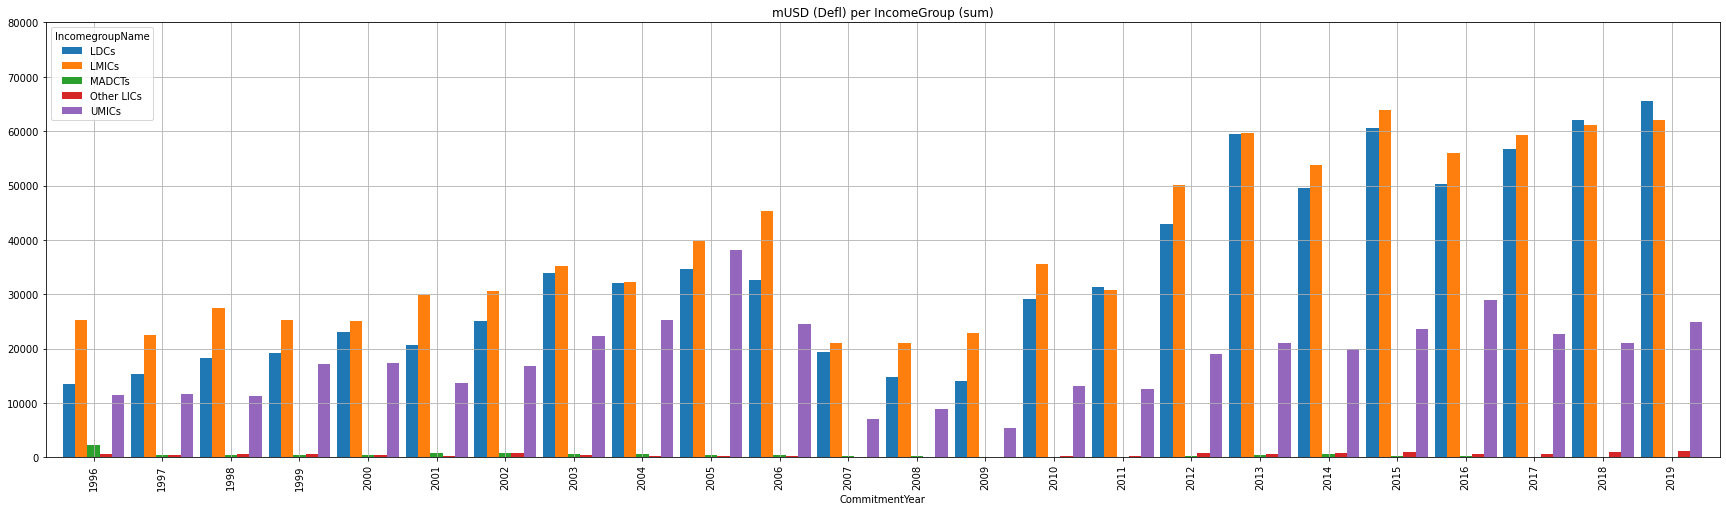

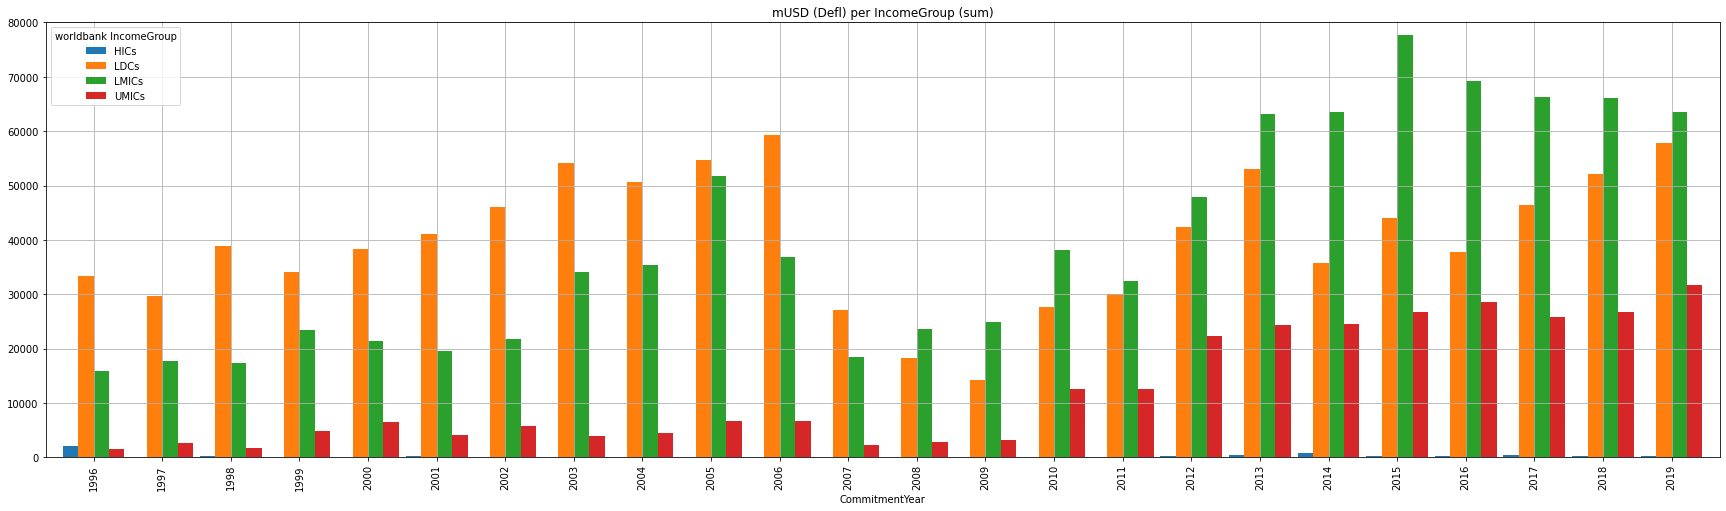

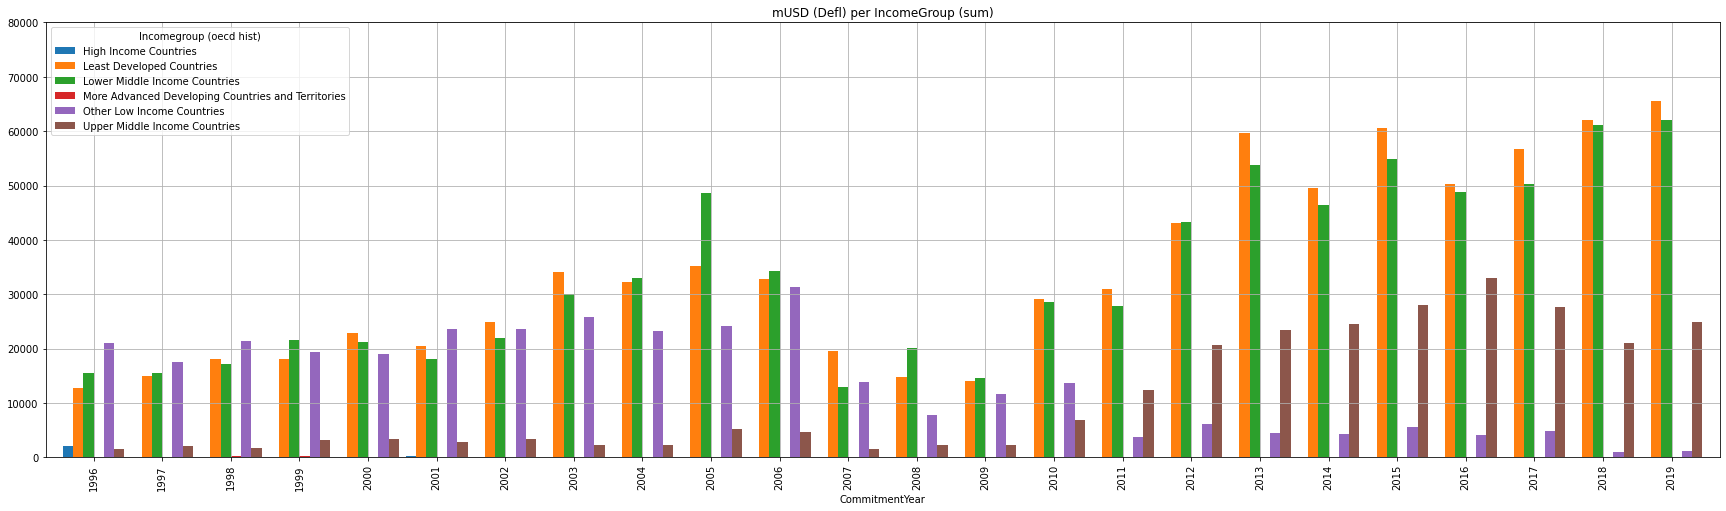

In [10]:
%%time

for igclassname in ["IncomegroupName","worldbank IncomeGroup","Incomegroup (oecd hist)"]:

    groupeddf= df.set_index("CommitmentDate")


    #display(df[df[incomegroupclassfeaturename].isnull()])
    groupeddf = groupeddf.groupby([Grouper(freq="A"), igclassname])['USD_Commitment_Defl']

    # resolve grouping, unstack, fill missing and reset_index()
    groupeddf = groupeddf.sum().unstack().fillna(0.0).reset_index()

    # an absolut view
    # create index on year as string and drop old index
    groupeddf["CommitmentYear"]=groupeddf["CommitmentDate"].apply(lambda x: str(x.year))
    groupeddf = groupeddf.drop(columns=["CommitmentDate"]).set_index("CommitmentYear")

    # plot absolut sum
    display(groupeddf.plot(width=0.9,grid=True,kind='bar',title="mUSD (Defl) per IncomeGroup (sum)",figsize=(30,8),
             ylim=(0, 80000)
             #color={"LDCs": "blue", "LMICs": "orange", "UMICs": "green","Other LICs": "black","MADCTs": "black"}
            ))
    

In [11]:
%%time

display("beautify the graphs by setting equal names")
df.replace({"IncomegroupName": { 
                "MADCTs": "HICs",
                "Other LICs": "LDCs"
            },
            "worldbank IncomeGroup": {
                "LDCS": "LDCs"
                
            },
            "Incomegroup (oecd hist)": {
                "High Income Countries": "HICs",
                "Least Developed Countries": "LDCs",
                "Lower Middle Income Countries": "LMICs",
                "More Advanced Developing Countries and Territories": "HICs",
                "Other Low Income Countries": "LDCs",
                "Upper Middle Income Countries": "UMICs"
                
            }},inplace=True)

'beautify the graphs by setting equal names'

CPU times: user 673 ms, sys: 147 ms, total: 820 ms
Wall time: 820 ms


<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

CPU times: user 3.22 s, sys: 509 ms, total: 3.73 s
Wall time: 3.73 s


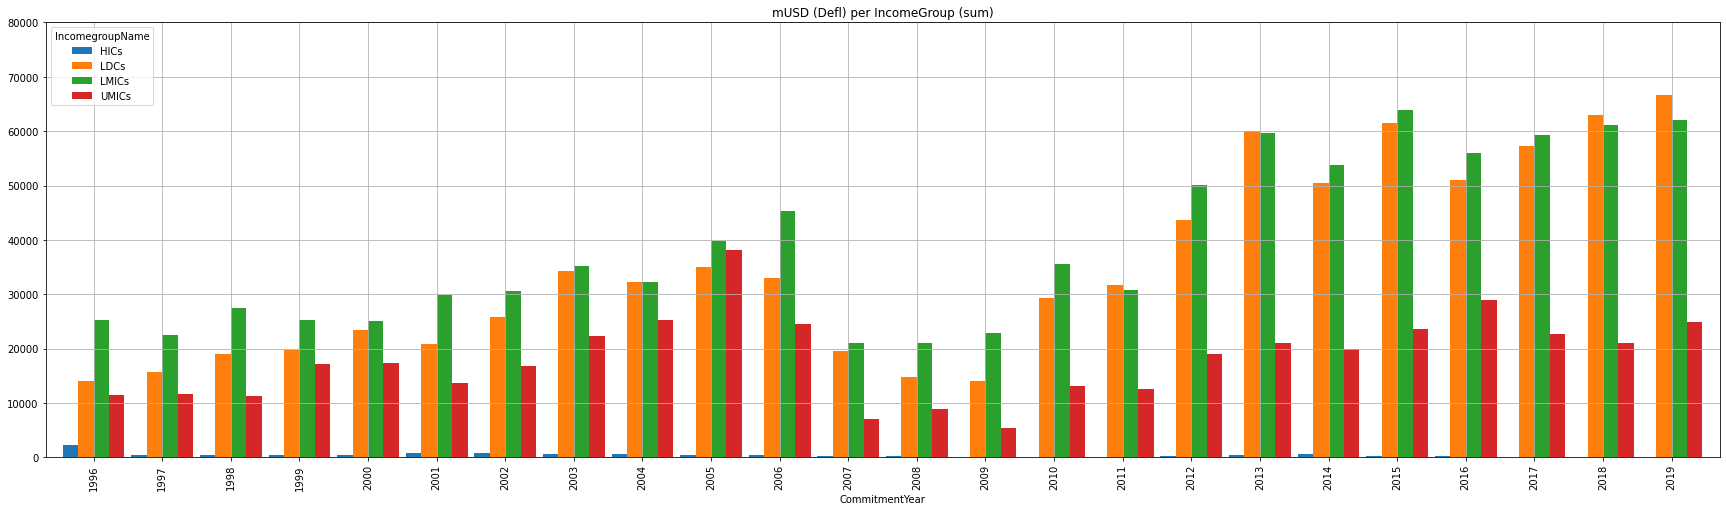

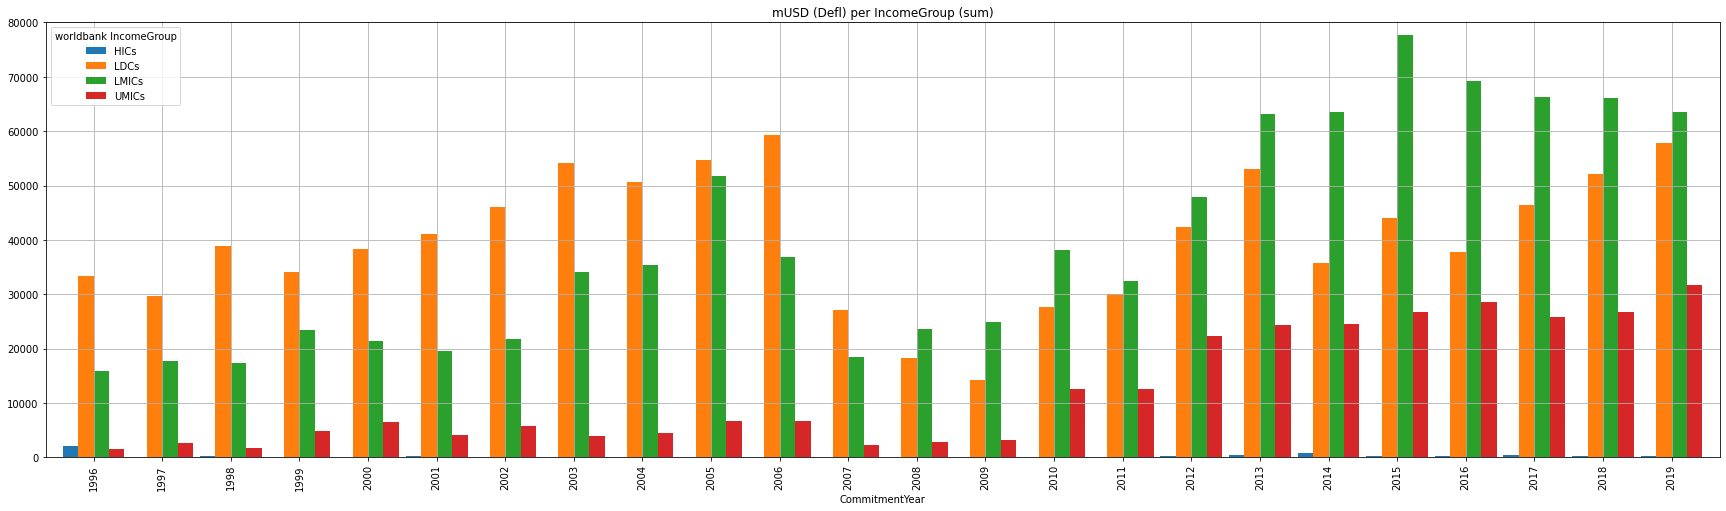

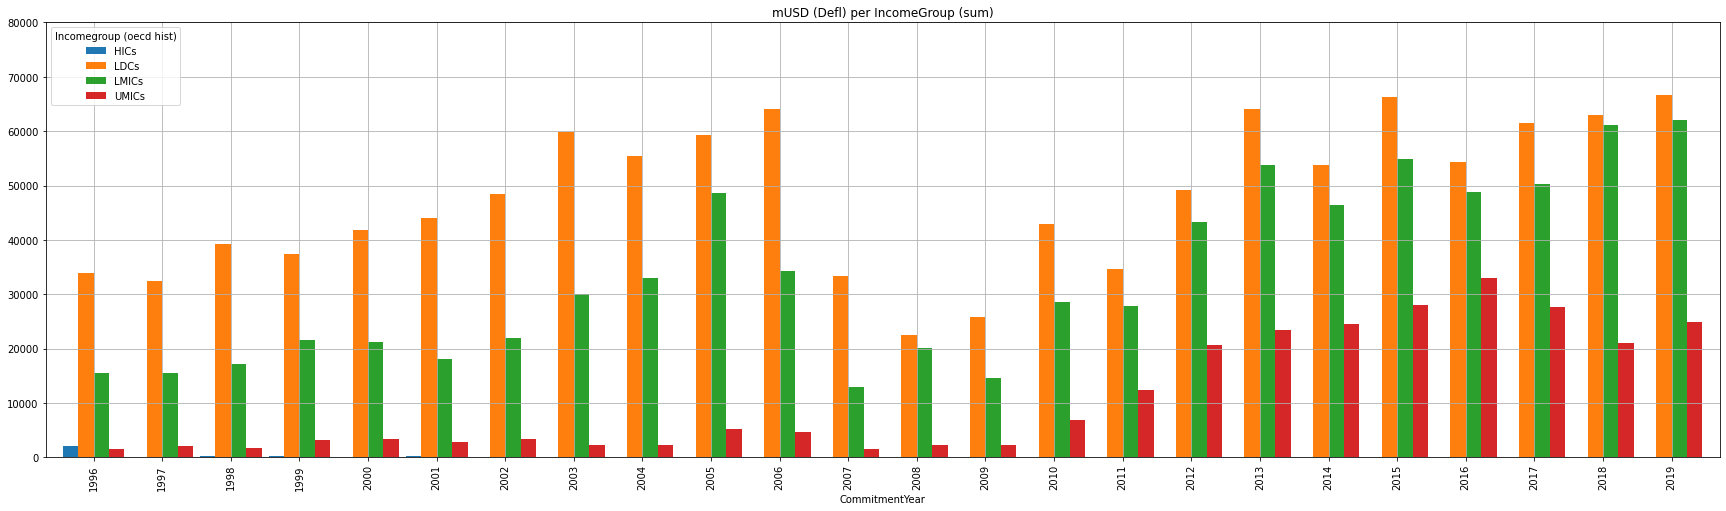

In [12]:
%%time

for igclassname in ["IncomegroupName","worldbank IncomeGroup","Incomegroup (oecd hist)"]:

    groupeddf= df.set_index("CommitmentDate")

    #display(df[df[incomegroupclassfeaturename].isnull()])
    groupeddf = groupeddf.groupby([Grouper(freq="A"), igclassname])['USD_Commitment_Defl']

    # resolve grouping, unstack, fill missing and reset_index()
    groupeddf = groupeddf.sum().unstack().fillna(0.0).reset_index()

    # an absolut view
    # create index on year as string and drop old index
    groupeddf["CommitmentYear"]=groupeddf["CommitmentDate"].apply(lambda x: str(x.year))
    groupeddf = groupeddf.drop(columns=["CommitmentDate"]).set_index("CommitmentYear")

    # plot absolut sum
    display(groupeddf.plot(width=0.9,grid=True,kind='bar',title="mUSD (Defl) per IncomeGroup (sum)",figsize=(30,8),
             ylim=(0, 80000)
             #color={"LDCs": "blue", "LMICs": "orange", "UMICs": "green","Other LICs": "black","MADCTs": "black"}
            ))
    

<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

<AxesSubplot:title={'center':'mUSD (Defl) per IncomeGroup (sum)'}, xlabel='CommitmentYear'>

CPU times: user 3.56 s, sys: 513 ms, total: 4.07 s
Wall time: 4.07 s


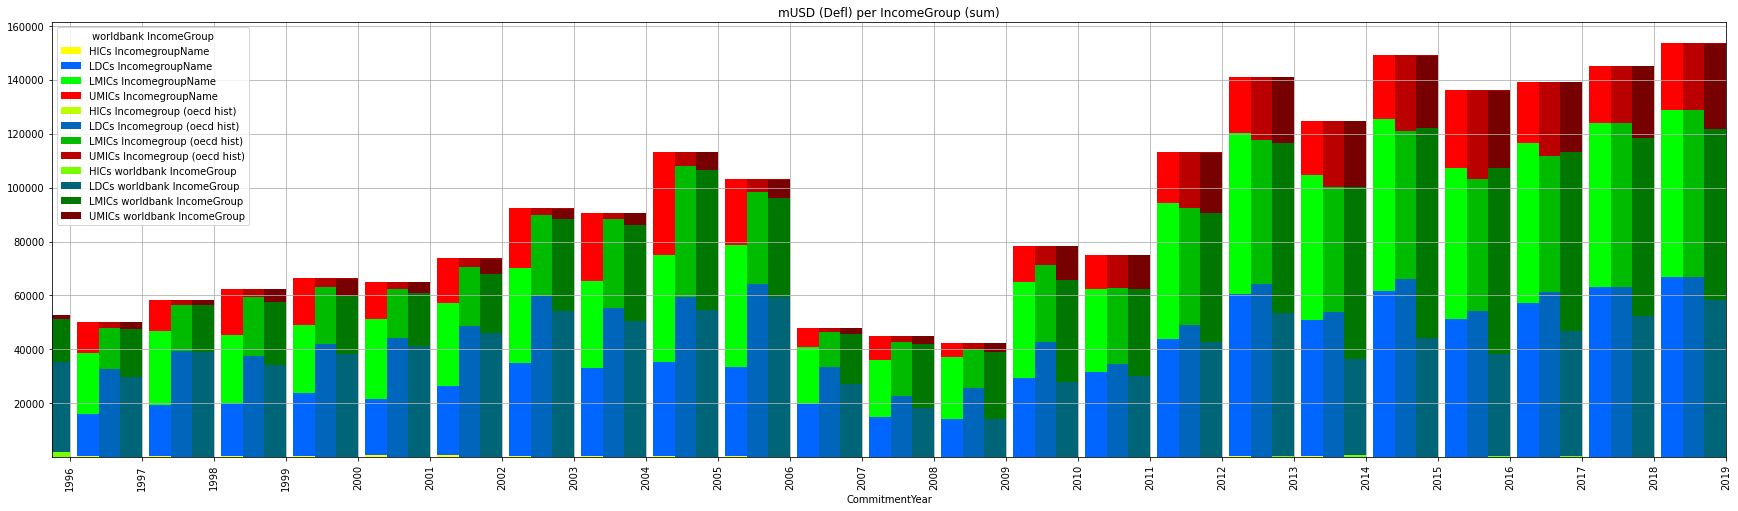

In [13]:
%%time

fig,ax = plt.subplots(figsize=(30,8))
width=[-0.3,-0.6,-0.9]
color={"LDCs": ["#0066ff","#0066bb","#006677"],
       "LMICs": ["#00ff00","#00bb00","#007700"],
       "UMICs": ["#ff0000","#bb0000","#770000"],
       "HICs": ["#ffff00","#bbff00","#77ff00"]}

for (i,igclassname) in enumerate(["IncomegroupName","Incomegroup (oecd hist)","worldbank IncomeGroup"]):

    groupeddf= df.set_index("CommitmentDate")
    groupeddf.replace({
        igclassname: {
            "LDCs": "LDCs "+igclassname,
            "LMICs": "LMICs "+igclassname,
            "UMICs": "UMICs "+igclassname,
            "HICs": "HICs "+igclassname
        }},inplace=True)

    #display(df[df[incomegroupclassfeaturename].isnull()])
    groupeddf = groupeddf.groupby([Grouper(freq="A"), igclassname])['USD_Commitment_Defl']

    # resolve grouping, unstack, fill missing and reset_index()
    groupeddf = groupeddf.sum().unstack().fillna(0.0).reset_index()

    # an absolut view
    # create index on year as string and drop old index
    groupeddf["CommitmentYear"]=groupeddf["CommitmentDate"].apply(lambda x: str(x.year))
    groupeddf = groupeddf.drop(columns=["CommitmentDate"]).set_index("CommitmentYear")
    # plot absolut sum_
    display(groupeddf.plot(stacked=True,ax=ax,width=width[2-i],align="edge",grid=True,kind='bar',title="mUSD (Defl) per IncomeGroup (sum)",figsize=(30,8),
             #ylim=(0, 8000
             color={"LDCs " + igclassname: color["LDCs"][i],
                    "LMICs " + igclassname: color["LMICs"][i],
                    "UMICs " + igclassname: color["UMICs"][i],
                    "HICs " + igclassname: color["HICs"][i]}
            ))
    